# Computational Physics Exercise 9
### Jan Kesting, Felix Fleischle - 30.6.2023 - Tutor: Jeong Yun Choi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementation of rk4:

In [2]:
def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

1. Solving the lorenz attractor using rk4

In [3]:
# Defining the derivatives - v0 is the vector containing (x,y,z)
def derivative_x(v0, sigma):
    return -sigma * (v0[0]-v0[1])

def derivative_y(v0, r):
    return r * v0[0] - v0[1] - v0[0]*v0[2]

def derivative_z(v0, b):
    return v0[0]*v0[1] - b*v0[2]

def master(v0, x0, sigma, r, b):
    return np.array([derivative_x(v0,sigma), derivative_y(v0,r), derivative_z(v0,b)])

In [4]:
# To use rk4 we need to define the r values and initial conditions that we want to use
r_values = np.array([0.55, 1.28, 1.75, 23.7, 28.5, 35.0])
b = 8./3.

# We choose the initial conditions near the (0,0,0) fixed point as (1,1,1)
init_cond = [np.array([1., 1., 1.])]

# similarly, we choose the initial conditions near (a_0, a_0, r-1) as (a_0+1, a_0+1, r)
a_0 = np.sqrt(b*(r_values[1:] - 1))
for i in range(len(r_values[1:])):
    init = np.array([a_0[i]+1, a_0[i]+1, (r_values[1:])[i]])
    init_cond.append(init)
    
init_cond = np.asarray(init_cond)
    
print("Initial conditions vector: \n", init_cond)

Initial conditions vector: 
 [[ 1.          1.          1.        ]
 [ 1.86409876  1.86409876  1.28      ]
 [ 2.41421356  2.41421356  1.75      ]
 [ 8.78031705  8.78031705 23.7       ]
 [ 9.56348839  9.56348839 28.5       ]
 [10.52190457 10.52190457 35.        ]]


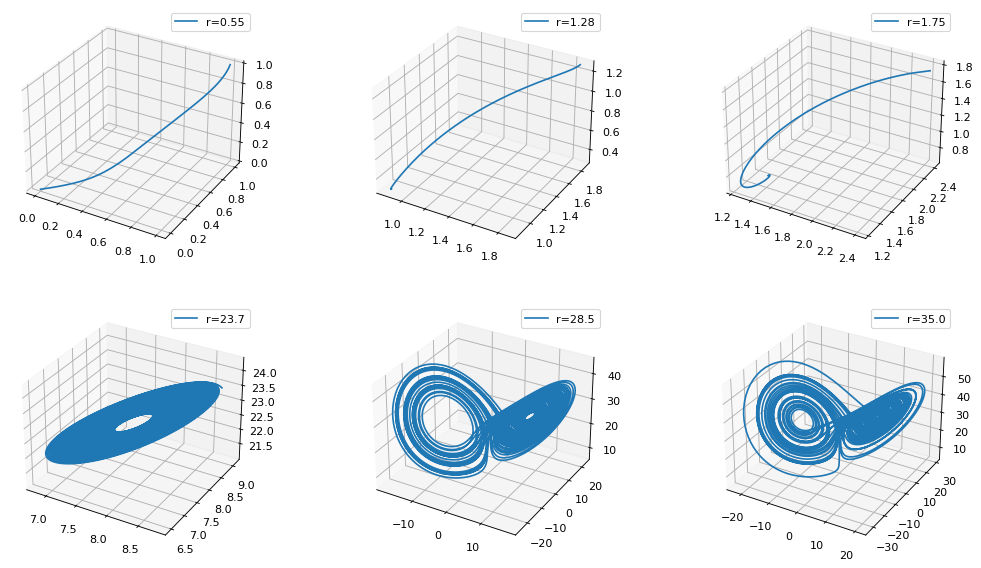

In [5]:
# now, perform the rk4

# step size
h = 0.005

# now do the rk4 for all different initial values and r values

fig = plt.figure(figsize=(16,9), dpi=80)
for j in range(len(r_values)):
    y,x = rk4(init_cond[j], 0, master, h, 10000, f_args={"sigma":10., "r":r_values[j], "b":8./3.})
    ax = fig.add_subplot(2,3,j+1,projection='3d')
    #plt.axes(projection="3d")
    ax.plot(y[:,0], y[:,1], y[:,2], label="r=" + str(r_values[j]))
    ax.legend()
    

    

For r=0.55 the fixed point is stable and the system converges to the fixed point. <br />
For r=1.28 the fixed point is stable as well and we can see the same behavior. <br />
For r=1.75 the same. <br />
For r=23.7 the fixed point is not stable, so the system circulates around the fixed point. <br />
For r=28.5 the system circulates around 2 unstable fixpoints. <br />
For r=35.0 the same.